In [31]:
import pandas as pd

# Load the dataset
data = pd.read_csv('world_real_estate_data.csv')

# Explore the dataset
print(data.head())  # Display the first few rows of the dataset

                                               title   country  \
0  2 room apartment 120 m² in Mediterranean Regio...    Turkey   
1              4 room villa 500 m² in Kalkan, Turkey    Turkey   
2          1 room apartment 65 m² in Antalya, Turkey    Turkey   
3             1 room apartment  in Pattaya, Thailand  Thailand   
4             2 room apartment  in Pattaya, Thailand  Thailand   

                                    location  building_construction_year  \
0               Mediterranean Region, Turkey                         NaN   
1  Kalkan, Mediterranean Region, Kas, Turkey                      2021.0   
2      Mediterranean Region, Antalya, Turkey                         NaN   
3      Chon Buri Province, Pattaya, Thailand                      2020.0   
4      Chon Buri Province, Pattaya, Thailand                      2026.0   

   building_total_floors  apartment_floor  apartment_rooms  \
0                    5.0              1.0              3.0   
1                    2

Explore the data to understand its structure and identify any missing values or outliers.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147536 entries, 0 to 147535
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       147536 non-null  object 
 1   country                     147406 non-null  object 
 2   location                    147405 non-null  object 
 3   building_construction_year  64719 non-null   float64
 4   building_total_floors       68224 non-null   float64
 5   apartment_floor             54592 non-null   float64
 6   apartment_rooms             74178 non-null   float64
 7   apartment_bedrooms          36982 non-null   float64
 8   apartment_bathrooms         55973 non-null   float64
 9   apartment_total_area        141796 non-null  object 
 10  apartment_living_area       27712 non-null   object 
 11  price_in_USD                144961 non-null  float64
 12  image                       147536 non-null  object 
 13  

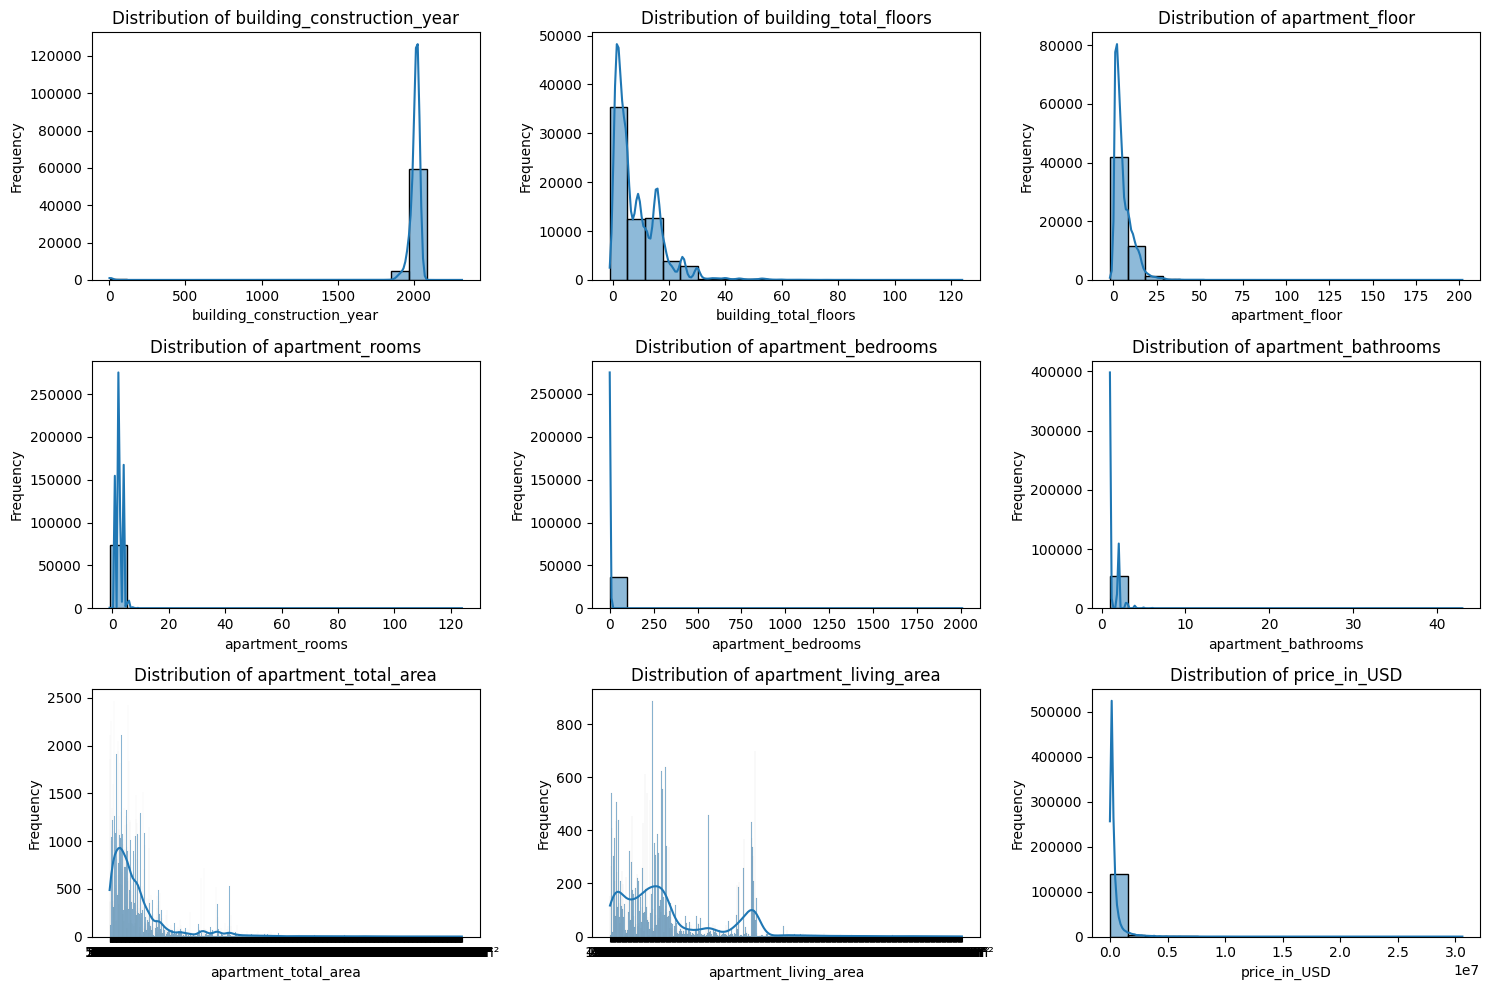

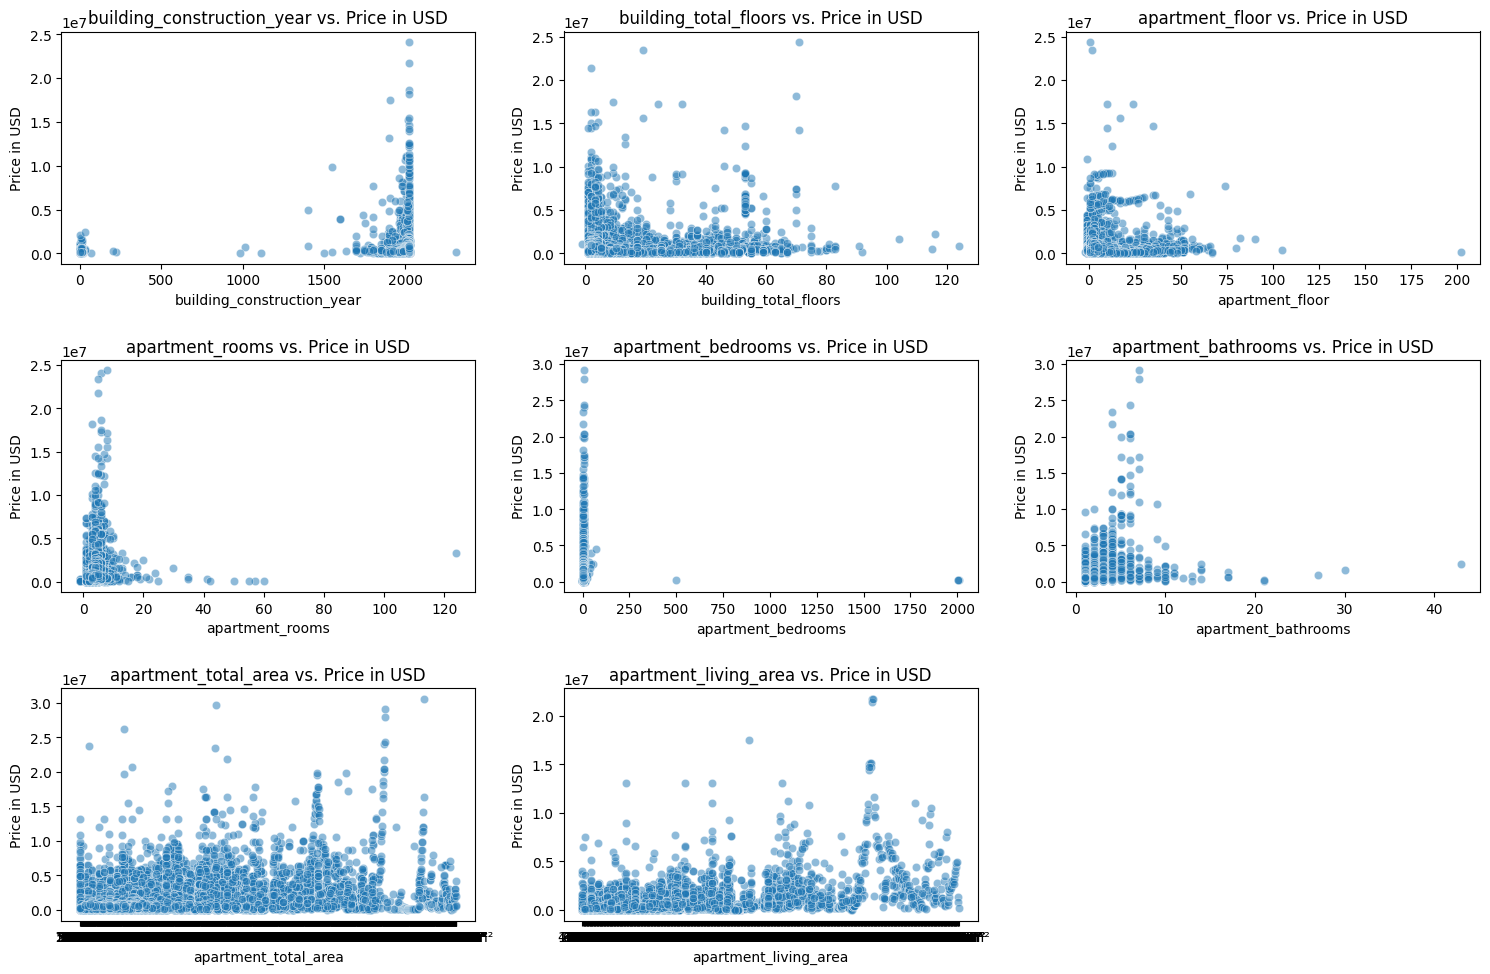

In [18]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values)

# Visualize the distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for numerical features
numerical_features = ['building_construction_year', 'building_total_floors', 'apartment_floor',
                      'apartment_rooms', 'apartment_bedrooms', 'apartment_bathrooms',
                      'apartment_total_area', 'apartment_living_area', 'price_in_USD']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize the relationship between numerical features and the target variable (Price in USD)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:-1], 1):
    plt.subplot(3, 3, i)
    #sns.scatterplot(data[feature], data['price_in_USD'], alpha=0.5)
    sns.scatterplot(x=data[feature], y=data['price_in_USD'], alpha=0.5)
    plt.title(f'{feature} vs. Price in USD')
    plt.xlabel(feature)
    plt.ylabel('Price in USD')

plt.tight_layout()
plt.show()


Preprocess the data by handling missing values and encoding categorical variables

In [32]:

# Define a function to convert area strings to numerical values
def convert_area_to_numeric(area_str):
    if pd.isna(area_str):
        return None  # Handle missing values appropriately
    numeric_part = area_str.replace(' m²', '').replace(',', '')  # Remove ' m²' and commas
    try:
        return float(numeric_part)  # Convert to float and scale to thousands
    except ValueError:
        return None  # Handle cases where conversion fails

# Apply the conversion function to both columns
data['apartment_total_area'] = data['apartment_total_area'].apply(convert_area_to_numeric)
data['apartment_living_area'] = data['apartment_living_area'].apply(convert_area_to_numeric)

# Display the DataFrame with the converted columns
print(data.head())


                                               title   country  \
0  2 room apartment 120 m² in Mediterranean Regio...    Turkey   
1              4 room villa 500 m² in Kalkan, Turkey    Turkey   
2          1 room apartment 65 m² in Antalya, Turkey    Turkey   
3             1 room apartment  in Pattaya, Thailand  Thailand   
4             2 room apartment  in Pattaya, Thailand  Thailand   

                                    location  building_construction_year  \
0               Mediterranean Region, Turkey                         NaN   
1  Kalkan, Mediterranean Region, Kas, Turkey                      2021.0   
2      Mediterranean Region, Antalya, Turkey                         NaN   
3      Chon Buri Province, Pattaya, Thailand                      2020.0   
4      Chon Buri Province, Pattaya, Thailand                      2026.0   

   building_total_floors  apartment_floor  apartment_rooms  \
0                    5.0              1.0              3.0   
1                    2

In [66]:

from sklearn.preprocessing import LabelEncoder


# Check for missing values
missing_values = data.isnull().sum()

# Handling missing values
# You can choose an appropriate strategy based on your data. In this example, we'll fill missing numerical values with their respective means.
data['building_construction_year'].fillna(data['building_construction_year'].mean(), inplace=True)
data['building_total_floors'].fillna(data['building_total_floors'].mean(), inplace=True)
data['apartment_floor'].fillna(data['apartment_floor'].mean(), inplace=True)
data['apartment_rooms'].fillna(data['apartment_rooms'].mean(), inplace=True)
data['apartment_bedrooms'].fillna(data['apartment_bedrooms'].mean(), inplace=True)
data['apartment_bathrooms'].fillna(data['apartment_bathrooms'].mean(), inplace=True)
data['apartment_total_area'].fillna(data['apartment_total_area'].mean(), inplace=True)
data['apartment_living_area'].fillna(data['apartment_living_area'].mean(), inplace=True)
data['price_in_USD'].fillna(data['price_in_USD'].mean(), inplace=True)

label_encoder = LabelEncoder()
data['title'] = label_encoder.fit_transform(data['title'])
"""# Encoding categorical variables
# In this example, we'll use Label Encoding for "Country" and "Location."
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['country'])
data['Location'] = label_encoder.fit_transform(data['location'])
"""
# Check the modified dataset
print(data.head())


   title  country  location  building_construction_year  \
0   8475       23      3843                 1996.921754   
1  47213       23      2548                 2021.000000   
2   5206       23      3826                 1996.921754   
3    637       22      1276                 2020.000000   
4   7077       22      1276                 2026.000000   

   building_total_floors  apartment_floor  apartment_rooms  \
0                    5.0         1.000000         3.000000   
1                    2.0         5.791709         2.572097   
2                    5.0         2.000000         2.000000   
3                   15.0         5.000000         2.000000   
4                    8.0         3.000000         3.000000   

   apartment_bedrooms  apartment_bathrooms  apartment_total_area  \
0            2.000000             2.000000            120.000000   
1            2.289222             1.364229            500.000000   
2            1.000000             1.000000             65.000000   


 Conduct exploratory data analysis (EDA) to gain insights into the dataset's distributions, correlations, and patterns.

Distribution of Numerical Features:
Visualize the distributions of numerical features using histograms or kernel density plots. This helps you understand the spread and shape of the data.

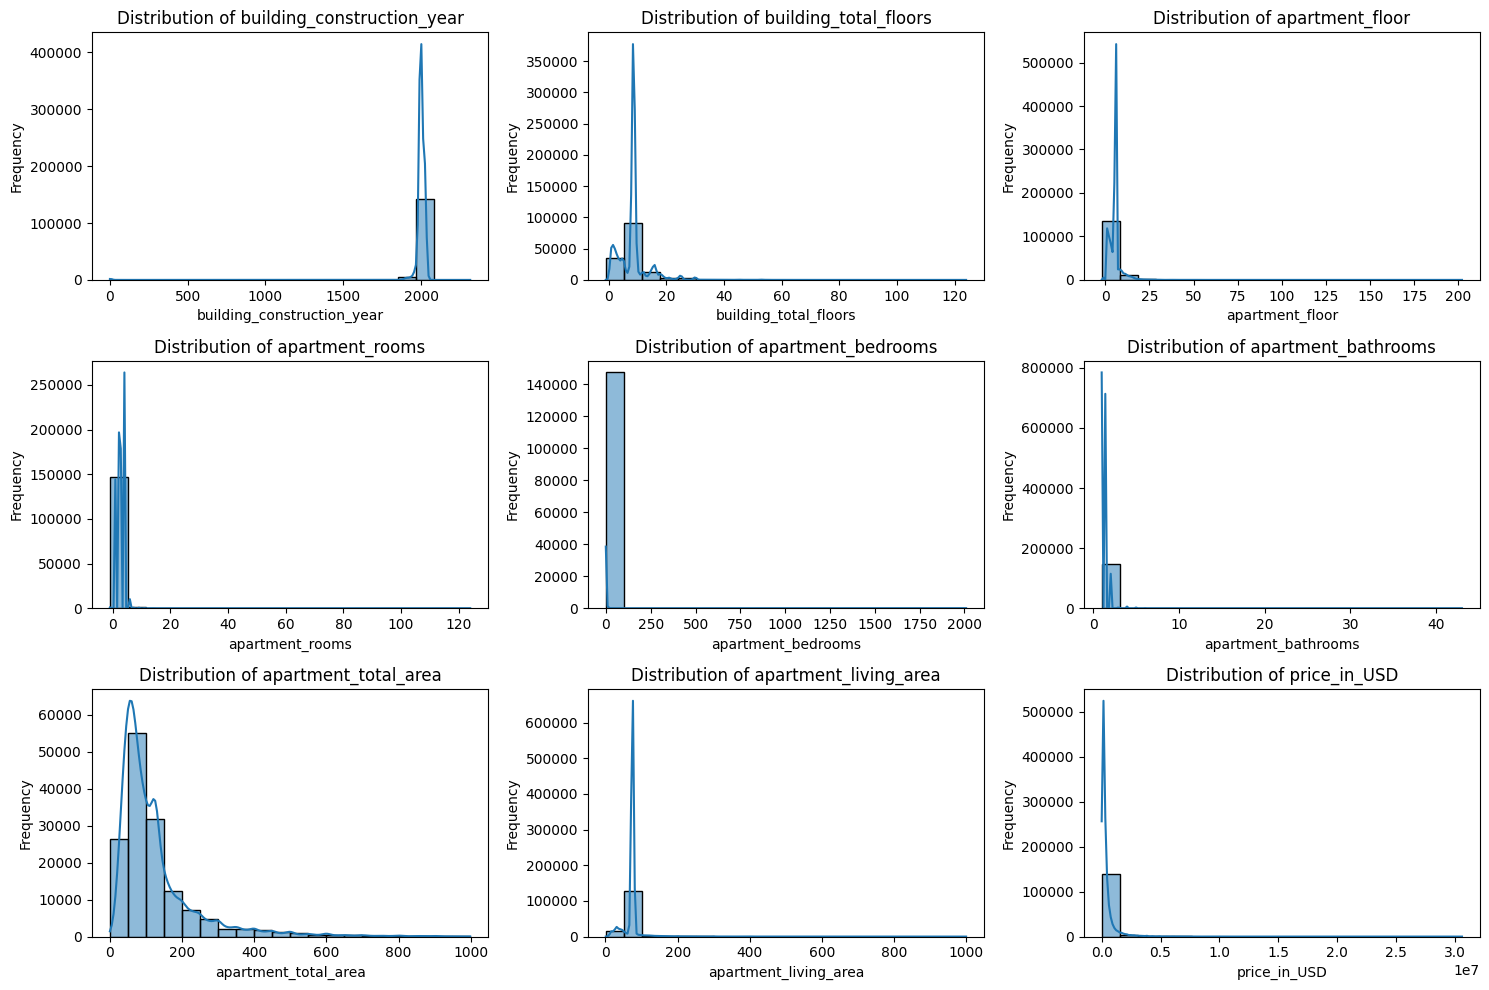

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for numerical features
numerical_features = ['building_construction_year', 'building_total_floors', 'apartment_floor',
                      'apartment_rooms', 'apartment_bedrooms', 'apartment_bathrooms',
                      'apartment_total_area', 'apartment_living_area', 'price_in_USD']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Correlation Matrix:
Create a correlation matrix to visualize the relationships between numerical features. This can help you identify which features are strongly correlated with the target variable.

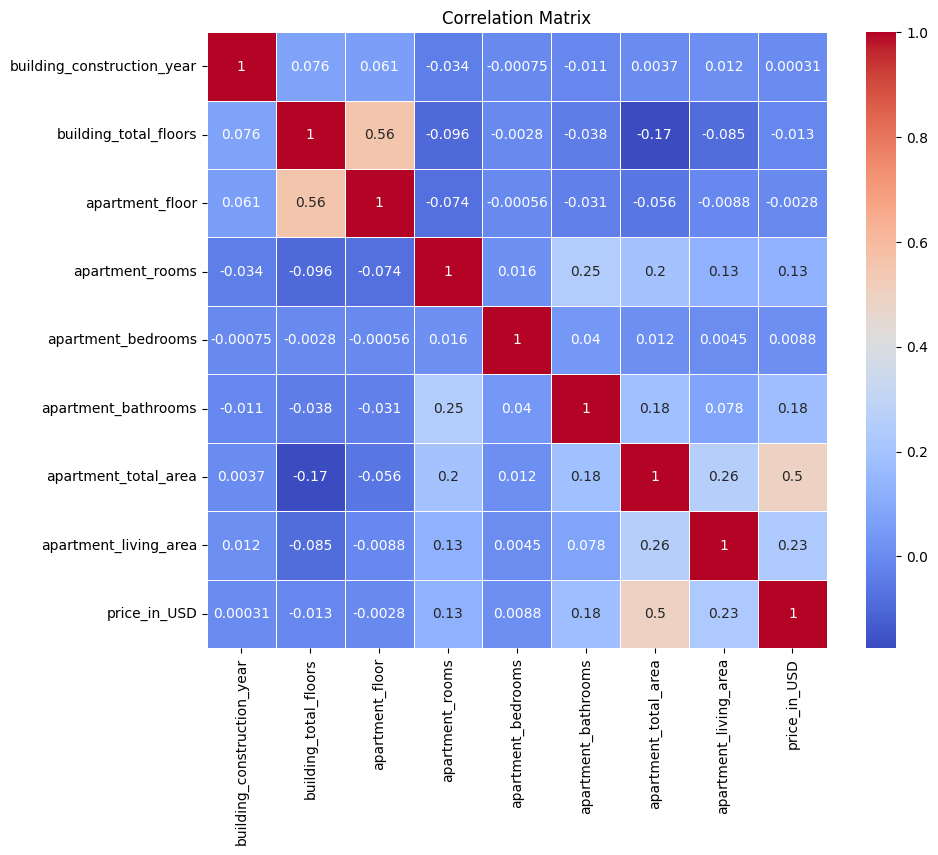

In [35]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Categorical Features:
If you have categorical features like 'Country' and 'Location,' you can explore their distributions using bar plots to see how data is distributed across different categories.

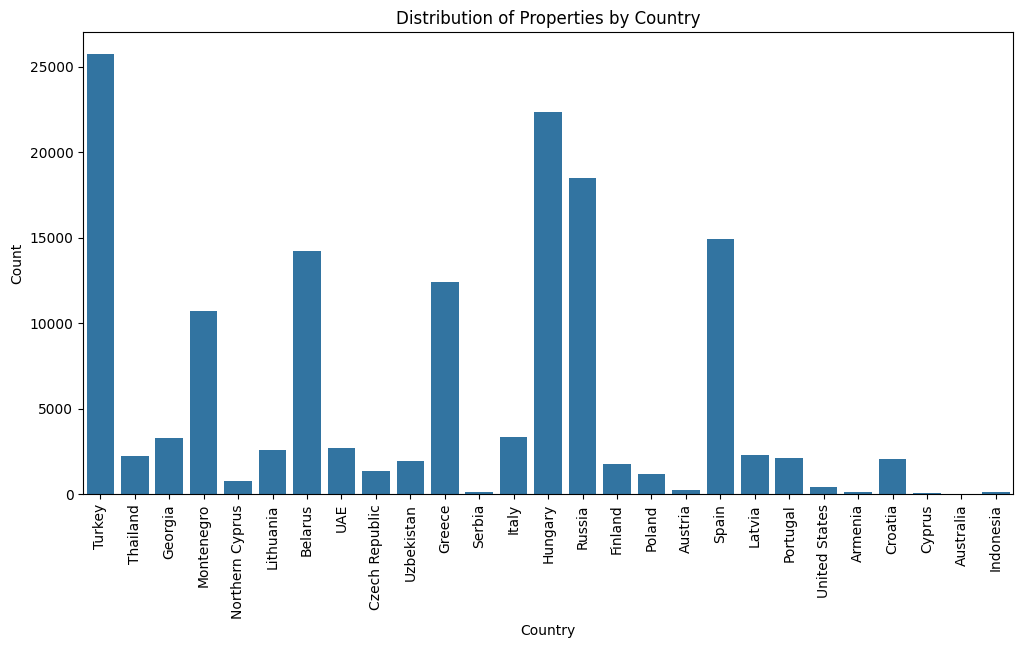

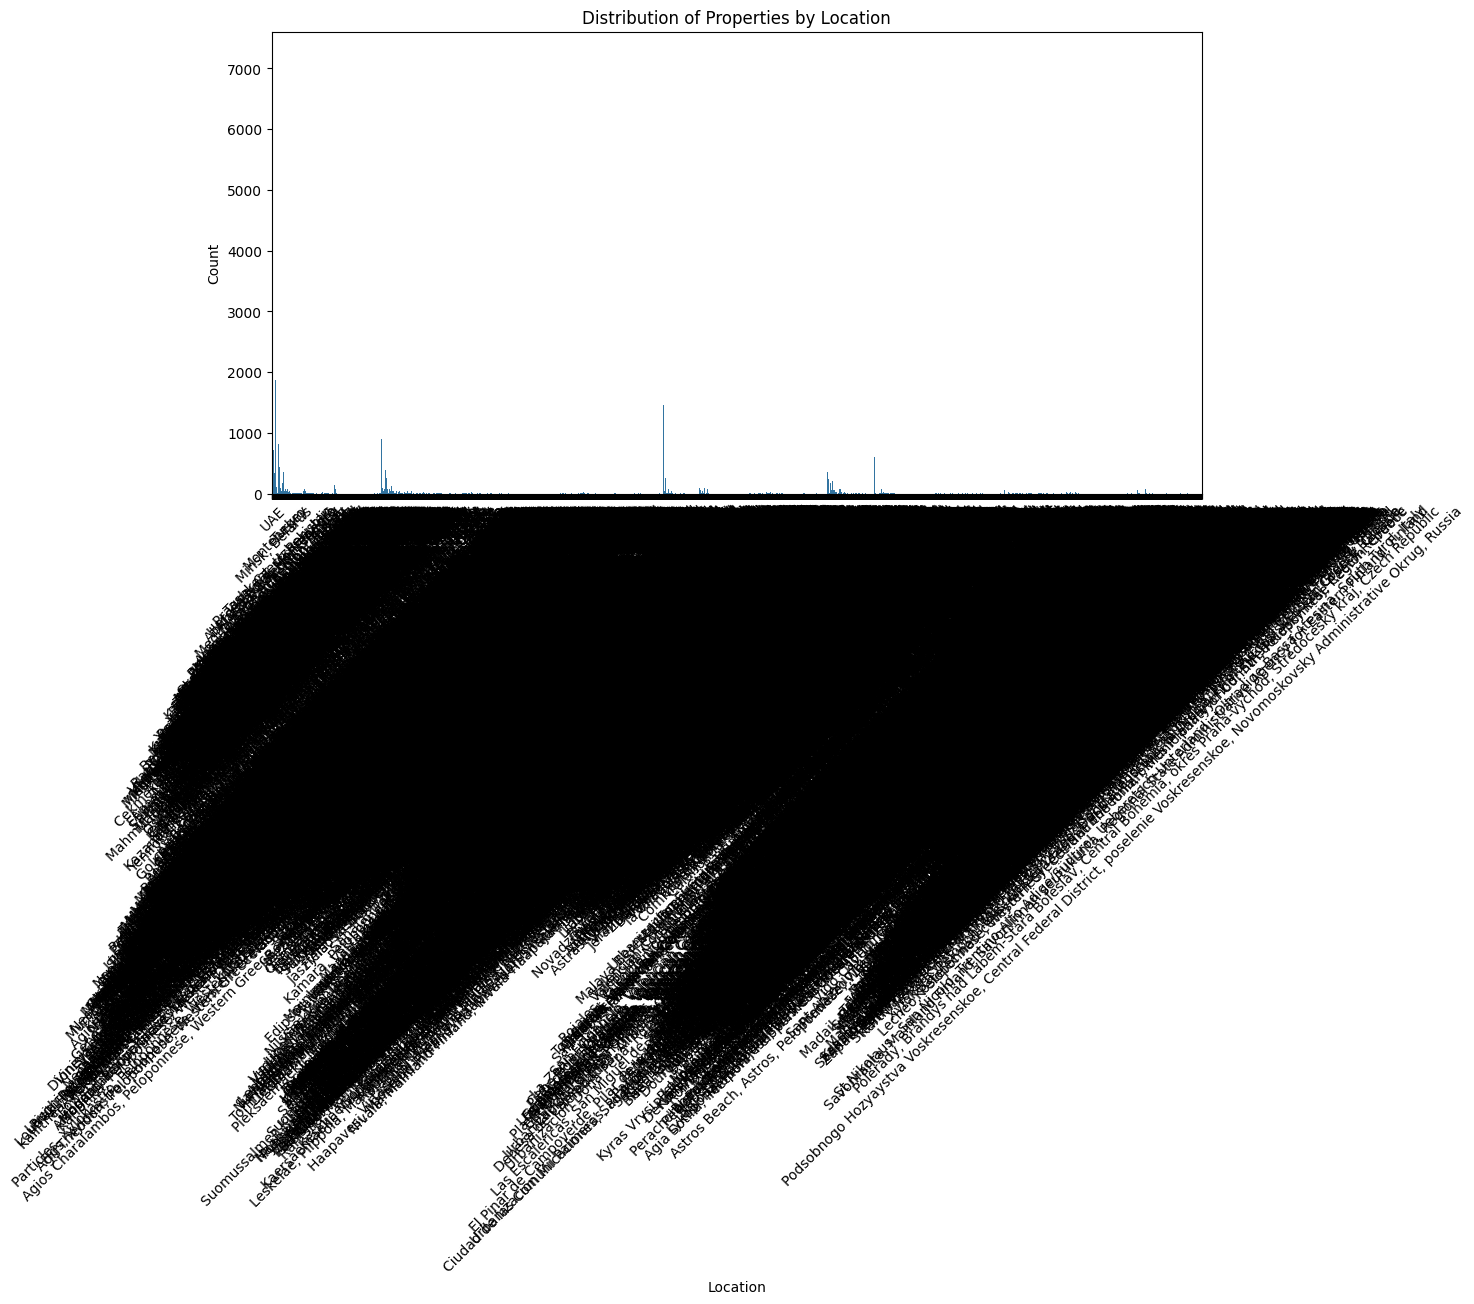

In [41]:
# Countplot for 'Country'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='country')
plt.title('Distribution of Properties by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Countplot for 'Location'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='location')
plt.title('Distribution of Properties by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Price vs. Features:
Explore how the target variable ('Price in USD') relates to other features using scatterplots or box plots.

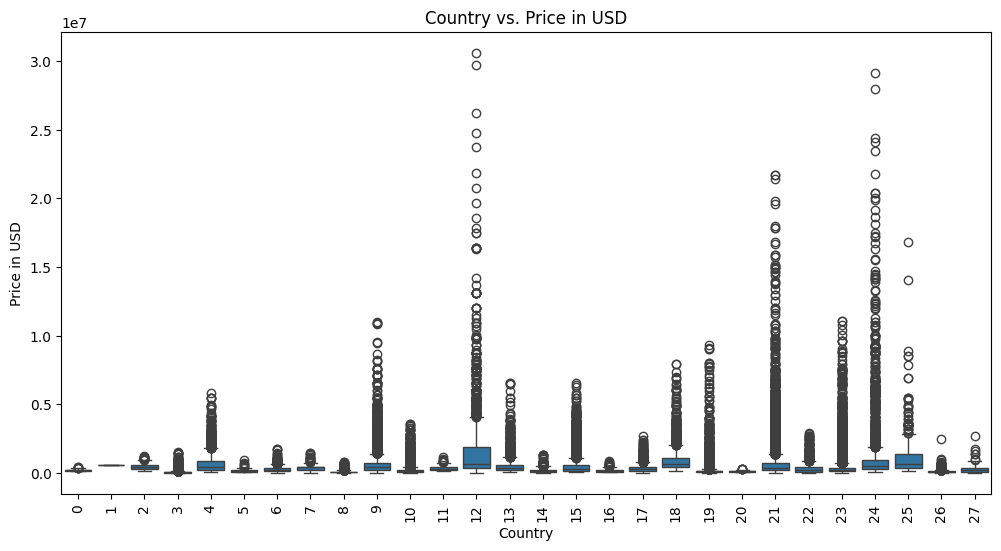

In [72]:
# Box plot of 'Country' vs. 'Price in USD'
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='country', y='price_in_USD')
plt.title('Country vs. Price in USD')
plt.xlabel('Country')
plt.ylabel('Price in USD')
plt.xticks(rotation=90)
plt.show()


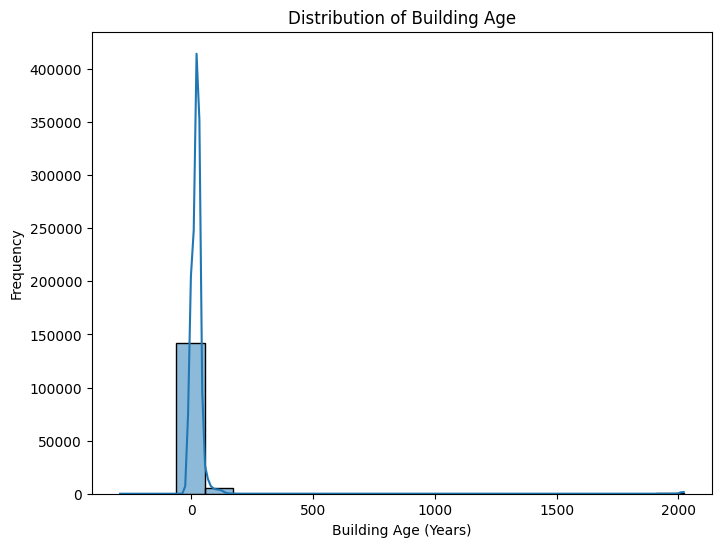

In [73]:
# Calculate Building Age
current_year = 2023  # Update with the current year
data['Building Age'] = current_year - data['building_construction_year']

# Check the distribution of the new feature
plt.figure(figsize=(8, 6))
sns.histplot(data['Building Age'], bins=20, kde=True)
plt.title('Distribution of Building Age')
plt.xlabel('Building Age (Years)')
plt.ylabel('Frequency')
plt.show()


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

label_encoder = LabelEncoder()
data['country'] = label_encoder.fit_transform(data['country'])
data['location'] = label_encoder.fit_transform(data['location'])
data['url'] = label_encoder.fit_transform(data['url'])
data['image'] = label_encoder.fit_transform(data['url'])

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 493368413982.2296
R-squared (R2) Score: 0.27908661547492697


In [69]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# The model is now trained and ready to make predictions


LinearRegression()

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 267985.06
MSE: 493368413982.23
RMSE: 702401.89
